<a href="https://colab.research.google.com/github/3x10e8/hrir/blob/main/hrtf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import CIPIC filterbank

In [1]:
# clone repo with updated .mat file
! git clone https://github.com/3x10e8/hrir.git

Cloning into 'hrir'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 10 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (10/10), done.


In [3]:
from scipy.io import loadmat
cipic = loadmat('hrir/hrir_final_R2015b.mat')

In [6]:
# Install pydub for converting mp3 to np array
try:
  import pydub
except ImportError:
  !pip install pydub

from IPython.display import Audio
import numpy as np
import matplotlib.pyplot as plt

# from https://stackoverflow.com/questions/53633177/how-to-read-a-mp3-audio-file-into-a-numpy-array-save-a-numpy-array-to-mp3
def mp3read(f, normalized=False):
    """MP3 to numpy array"""
    a = pydub.AudioSegment.from_mp3(f)
    y = np.array(a.get_array_of_samples())
    if a.channels == 2:
        y = y.reshape((-1, 2))
    if normalized:
        return a.frame_rate, np.float32(y) / 2**15
    else:
        return a.frame_rate, y

## Import audio file

In [7]:
FILENAME = 'hrir/sample.mp3'
fs, y = mp3read(FILENAME, normalized = True)
y = y.transpose() # Shape=(NCHAN, NSAMPLES)

## Trim audio file

In [8]:
tstart_s = 106
tend_s = tstart_s + 8 # play an 8 second clip
y_clip = y[:, int(tstart_s*fs) :int(tend_s*fs)]
Audio(data=y_clip, rate=fs)

## Filter audio sample through L/R HRIRs

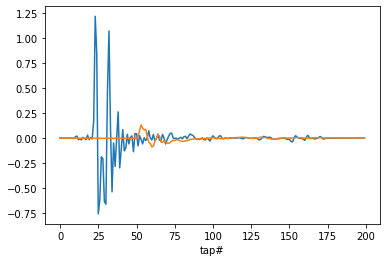

In [ ]:
az = 0
el = 0
firL = cipic['hrir_l'][az][el]
firR = cipic['hrir_r'][az][el]

plt.plot(firL, label='Left HRIR')
plt.plot(firR, label='Right HRIR')
plt.xlabel('tap#')

outL = np.convolve(y_clip[0,:], firL)
outR = np.convolve(y_clip[1,:], firR)
out = np.stack([outL, outR], axis=0)

Audio(data=out, rate=fs, autoplay=False)

(-1.0779205322265626,
 1.0922027587890626,
 -1.092243190715177,
 1.1710535135204412)

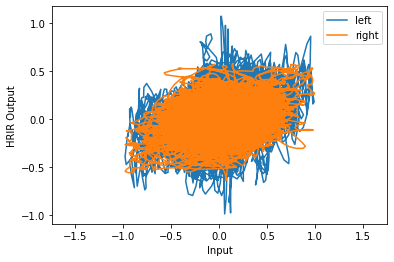

In [ ]:
NUM_SAMPLES = fs
NTAPS = len(firL)
plt.plot(y_clip[0][:NUM_SAMPLES], 
         outL[NTAPS :NTAPS+NUM_SAMPLES], 
         label='left')
plt.plot(y_clip[1][:NUM_SAMPLES], 
         outR[NTAPS :NTAPS+NUM_SAMPLES], 
         label='right')
plt.xlabel('Input')
plt.ylabel('HRIR Output')
plt.legend()
plt.axis('equal')

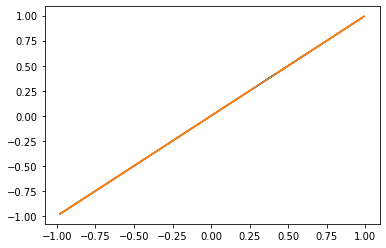

In [ ]:
plt.plot(y_clip[0][:NUM_SAMPLES], 
         y_clip[0][:NUM_SAMPLES],
         label='left')
plt.plot(y_clip[1][:NUM_SAMPLES], 
         y_clip[1][:NUM_SAMPLES], 
         label='right')